In [1]:
# 基础包
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [2]:
# 基础函数
# 对显示图片进行封装
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(delay=0) # 无限制的等待用户按键
    cv2.destroyAllWindows()
# 用matplotlib将图片显示到notebook
def plt_show(img):
    # opencv读取的图片是BRG通道，matplotlib读取的图片是RGB通道
    cv_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转



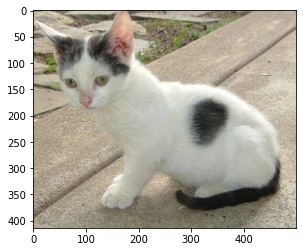

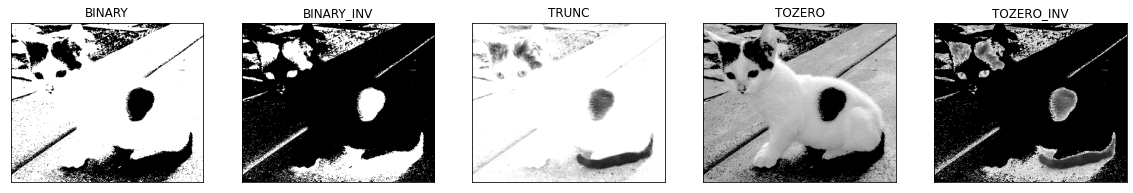

In [3]:
img = cv2.imread('imgs/cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = [ 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [thresh1, thresh2, thresh3, thresh4, thresh5]
plt_show(img)
fig = plt.figure(figsize=(20,100))
for i in range(5):
    plt.subplot(1, 5, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### 图像平滑

![](imgs/images.png)

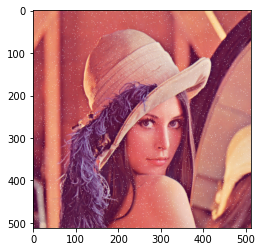

In [4]:
img = cv2.imread('imgs/lenaNoise.png')
plt_show(img)

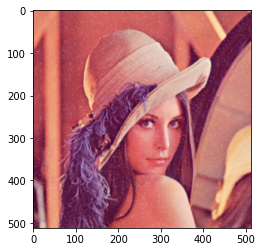

In [5]:
# 均值滤波
# 简单的平均卷积操作
blur = cv2.blur(img, (3, 3))
plt_show(blur)

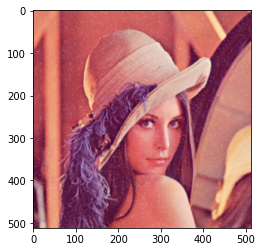

In [6]:
# 方框滤波
# 基本和均值一样，可以选择归一化
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  
plt_show(box)

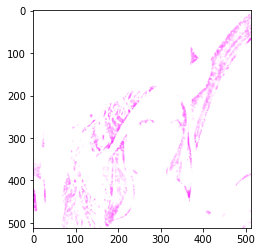

In [7]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  
plt_show(box)

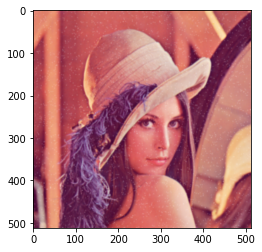

In [8]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img, (5, 5), 1)  
plt_show(aussian)

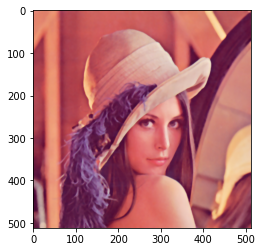

In [9]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波
plt_show(median)

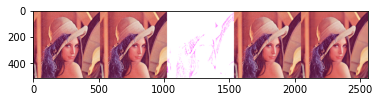

In [10]:
# 展示所有的
res = np.hstack((img,blur,box,aussian,median))
plt_show(res)

In [11]:
test_np = np.array([[1,2,3],[4,5,6],[7,8,9]],dtype='uint8')
print('均值滤波\n',cv2.blur(test_np,(3,3)))
print('方框滤波\n',cv2.boxFilter(test_np,-1,(3,3)))
print('高斯滤波\n',cv2.GaussianBlur(test_np,(3,3),1))
print('中值滤波\n',cv2.medianBlur(test_np,3))

均值滤波
 [[4 4 4]
 [5 5 5]
 [6 6 6]]
方框滤波
 [[4 4 4]
 [5 5 5]
 [6 6 6]]
高斯滤波
 [[3 4 4]
 [5 5 5]
 [6 6 7]]
中值滤波
 [[2 3 3]
 [4 5 6]
 [7 7 8]]
